Excercise 1 - Divergence problem

c:\Users\xyz\anaconda3\envs\stan_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



          lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -0.131680       0.863682    0.364907          2.0           3.0   
1    -0.280039       0.965907    0.364907          1.0           1.0   
2    -0.044544       0.981047    0.364907          2.0           7.0   
3    -0.018847       0.951248    0.364907          3.0          13.0   
4    -1.527530       0.186787    0.364907          2.0           3.0   
...        ...            ...         ...          ...           ...   
3995 -0.147625       0.987255    0.423111          3.0           7.0   
3996 -2.288220       0.813789    0.423111          3.0           9.0   
3997 -1.634000       0.986356    0.423111          3.0           7.0   
3998 -0.862455       0.975620    0.423111          2.0           3.0   
3999 -1.086800       0.989335    0.423111          2.0           3.0   

      divergent__  energy__        mu     sigma  
0             0.0  3.269360  0.070452  0.246070  
1             0.0  0.285408  0.132

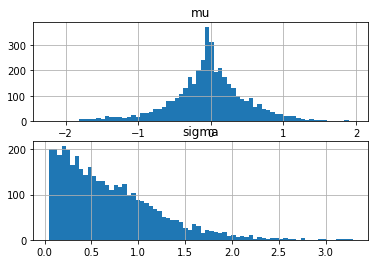

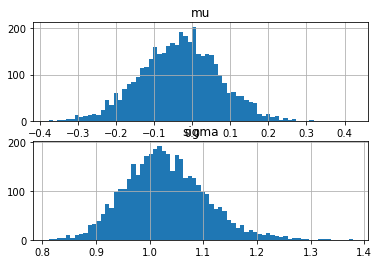

In [1]:
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
import pandas as pd

normal_csv = pd.read_csv('normal.csv', index_col=0, header=0)
model = CmdStanModel(stan_file="stan1.stan")

data1 = {
    "N": 1,
    "y": [normal_csv['value'][0]]
}

data2 = {
    "N": len(normal_csv['value']),
    "y": normal_csv['value'].to_list()
}

fit1 = model.sample(data=data1)
fit2 = model.sample(data=data2)

df1 = fit1.draws_pd()
df2 = fit2.draws_pd()
print(df1)
print(df2)

bins = 70
plt.figure(1)
plt.subplot(2,1,1)
df1["mu"].hist(bins=bins)
plt.title("mu")

plt.subplot(2,1,2)
df1["sigma"].hist(bins=bins)
plt.title("sigma")


plt.figure(2)
plt.subplot(2,1,1)
df2["mu"].hist(bins=bins)
plt.title("mu")

plt.subplot(2,1,2)
df2["sigma"].hist(bins=bins)
plt.title("sigma")
plt.show()

# Conclusions:
# The more observations there are, the wider range
# of predictions and higher sigma


Excercise 2 - Binominial example

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


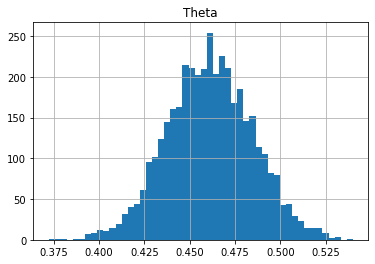

In [4]:
coin_csv = pd.read_csv('coin.csv', index_col=0, header=0)

data = {
    "N": len(coin_csv['Toss_Result']),
    "y": coin_csv['Toss_Result'].to_list()
}

model = CmdStanModel(stan_file="stan2.stan")
fit = model.sample(data)
df = fit.draws_pd()

# print(df)
 
bins = 50
df["theta"].hist(bins = bins)
plt.title('Theta')
plt.show()

Excercise 3 - Predictive checks

In [6]:
model3 = CmdStanModel(stan_file='stan3.stan')
sample3 = model3.sample({'N': len(normal_csv['value']), 'y': normal_csv['value'].to_list()})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)




chain 1 |████      | 00:00 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      
chain 3 |██████████| 00:00 Sampling completed                      
chain 4 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -53.8533       0.967921    0.859270          2.0           3.0   
1    -53.7283       1.000000    0.859270          2.0           3.0   
2    -53.2074       0.995261    0.859270          3.0           7.0   
3    -53.0848       0.998091    0.859270          3.0           7.0   
4    -54.0397       0.946076    0.859270          2.0           3.0   
...       ...            ...         ...          ...           ...   
3995 -52.3491       0.966505    0.851572          2.0           3.0   
3996 -53.8658       0.857166    0.851572          3.0           7.0   
3997 -52.4917       1.000000    0.851572          2.0           3.0   
3998 -53.6746       0.876017    0.851572          2.0           3.0   
3999 -52.4997       0.986813    0.851572          2.0           3.0   

      divergent__  energy__        mu     sigma  y_rep[1]  ...  y_rep[91]  \
0             0.0   54.1735  0.034697  0.910574 -0.709469  ...   0.82

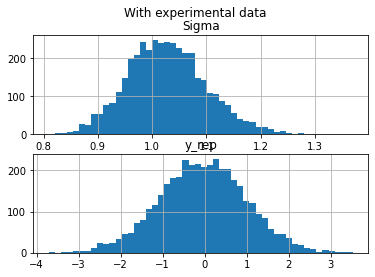

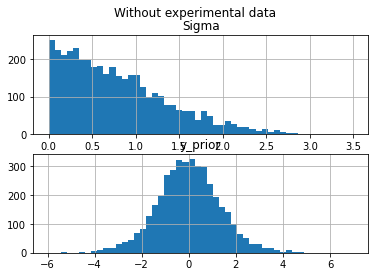

In [7]:
data1 = {
    "N": len(normal_csv['value']),
    "y": normal_csv['value'].to_list()
}

data2 = {
    "N": len(normal_csv['value'])
}

model1 = CmdStanModel(stan_file="stan3.stan")
model2 = CmdStanModel(stan_file="stan4.stan")

fit1 = model1.sample(data=data1)
fit2 = model2.sample(data=data2)

df1 = fit1.draws_pd()
df2 = fit2.draws_pd()

print(df1)
print(df2)


bins = 50
plt.subplot(2,1,1)
df1['sigma'].hist(bins = bins)
plt.title("Sigma")
plt.subplot(2,1,2)
df1['y_rep[1]'].hist(bins = bins)
plt.title("y_rep")
plt.suptitle("With experimental data")


plt.figure(2)
plt.subplot(2,1,1)
df2['sigma'].hist(bins=bins)
plt.title("Sigma")
plt.subplot(2,1,2)
df2['y_prior[1]'].hist(bins = bins)
plt.title("y_prior")
plt.suptitle("Without experimental data")
plt.show()

# Conclusion:
# Experimental data shifts the probability distribution plot
# towards the probability distribution of the experimental data